In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [59]:
!unzip -u '../../yemen-data.zip' -d '../../yemen-data/'

Archive:  ../../yemen-data.zip


In [60]:
data = pd.read_csv('../../yemen-data/Yemen Cholera Outbreak Epidemiology Data - Data_Country_Level.csv')

data.shape

(148, 7)

In [68]:
data = data[1:]


In [69]:
data.dtypes

Date                      object
Cases                     object
Deaths                    object
CFR (%)                   object
Attack Rate (per 1000)    object
Bulletin Type             object
Bulletin URL              object
dtype: object

In [86]:
data['Date'] = pd.to_datetime(data['Date'])
data['Deaths'] = pd.to_numeric(data['Deaths'])
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month

In [87]:
monthly_deaths = data.groupby(['Year', 'Month'], as_index=False).sum()

monthly_deaths

,Year,Month,Deaths
0,2017,5,1364
1,2017,6,23691
2,2017,7,51737
3,2017,8,39965
4,2017,9,60437
5,2017,10,38902
6,2017,11,17586
7,2017,12,4463
8,2018,1,8985
9,2018,2,6771


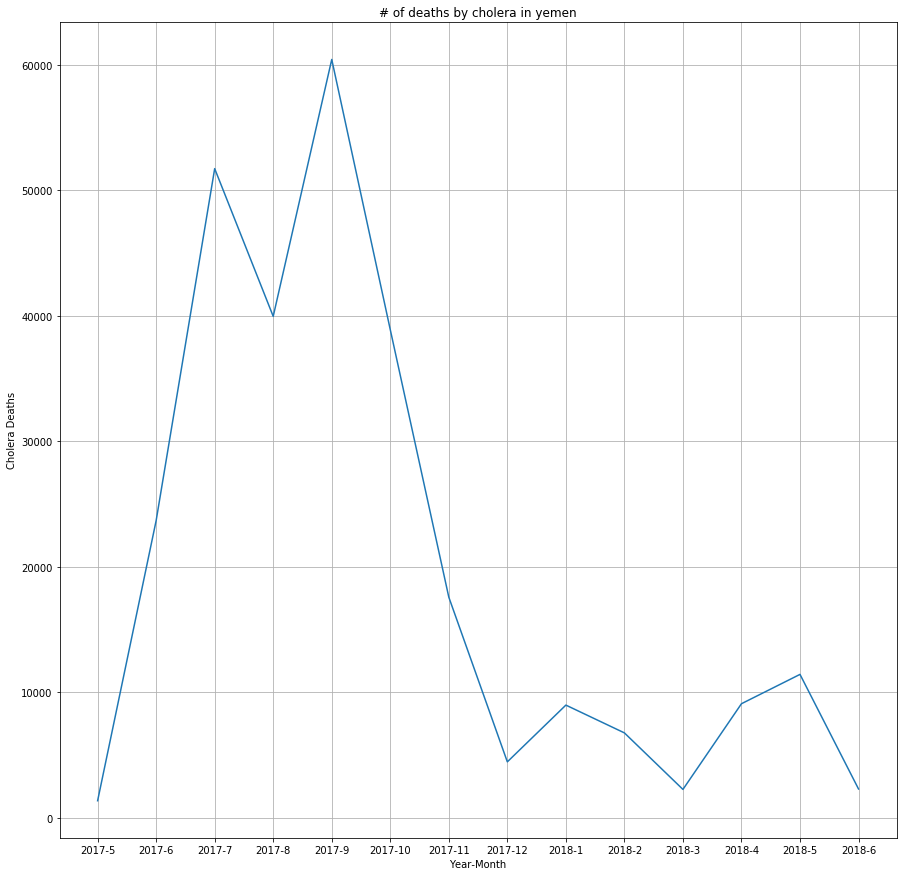

In [121]:
fig, axis = plt.subplots()

fig.set_figheight(15)
fig.set_figwidth(15)

axis.plot(monthly_deaths['Year'].astype(str) + '-'  + monthly_deaths['Month'].astype(str), 
         monthly_deaths['Deaths'])

axis.set_xlabel('Year-Month')
axis.set_ylabel('Cholera Deaths')

axis.set_title('# of deaths by cholera in yemen')
plt.grid(True)
plt.show()